In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Seaborn
Библиотека для визуализации данных, надстроенная над matplotlib. Предоставляет высокоуровневый интерфейс для визуализации сложных датасетов. Все то же самое можно сделать на чистом  matplotlib, но будем много кода, очень много и его надо уметь писать

In [3]:
#задаем дефолтное представление графиков
sns.set()

In [4]:
flights = sns.load_dataset("flights") # import dataset
flights


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [5]:
dataByYear = {}
yearSet = sorted(set(flights['year']))
print(yearSet)

for year in yearSet:
    yearData = flights[flights.year == year]
    dataByYear[year] = yearData.copy()
    dataByYear[year].index = dataByYear[year]['month']

[1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]


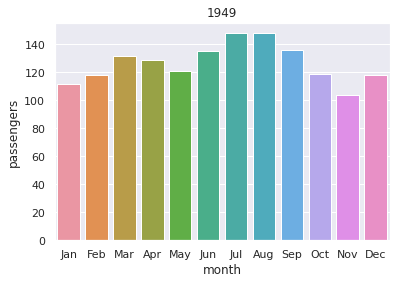

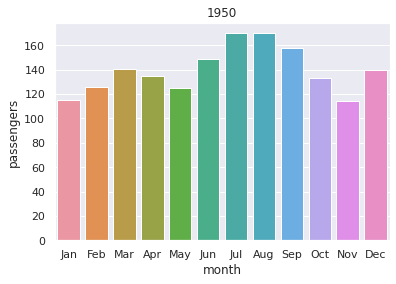

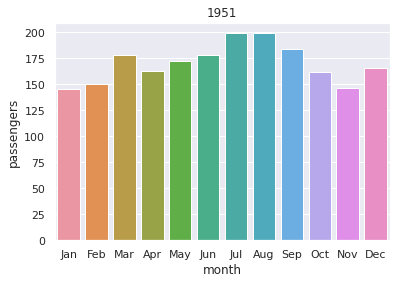

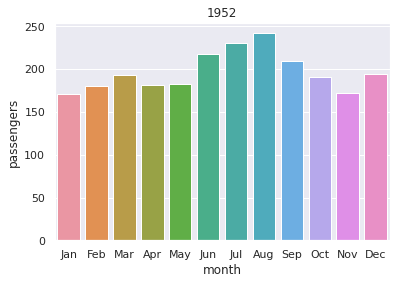

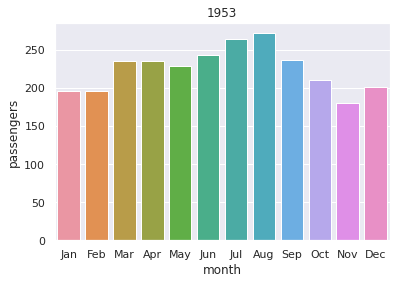

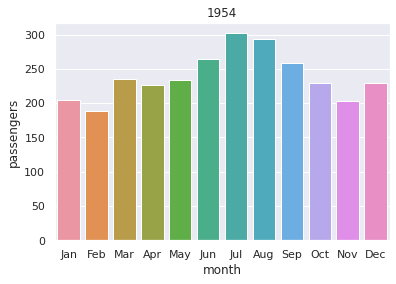

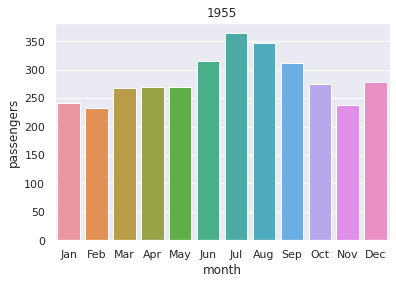

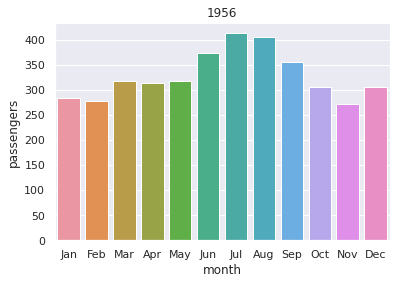

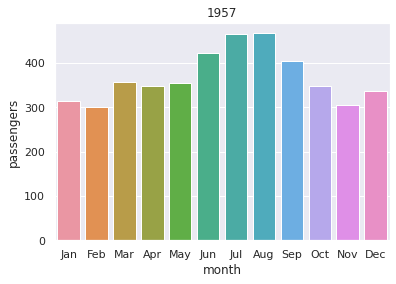

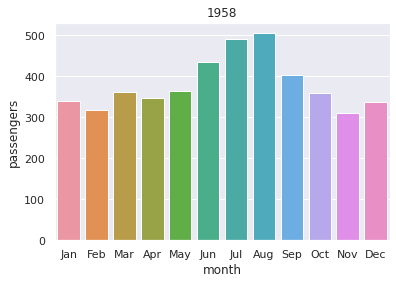

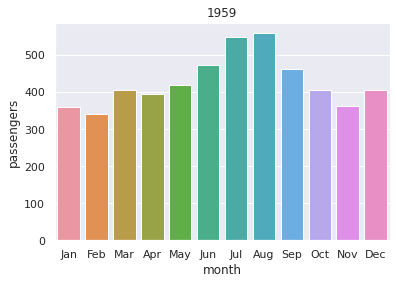

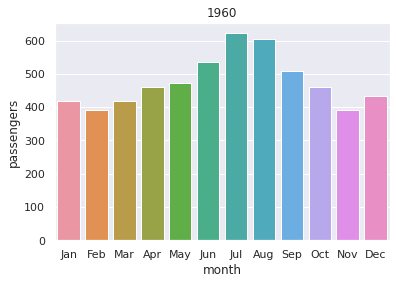

In [6]:
for year in dataByYear.keys():
    data = dataByYear[year]
    months = data['month']
    passengers = data['passengers']
    sns.barplot(months, passengers).set(title = year)
    plt.show()

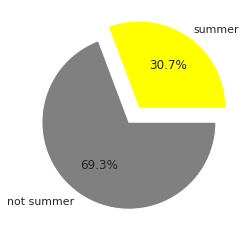

In [7]:
summerMonth = ['Jun','Jul','Aug']
year = 1959
data = dataByYear[year]
summerPassengers = data[['month', 'passengers']][data.month.isin(summerMonth)].agg('sum')[0]
notSummerPassengers = data[['month', 'passengers']][~data.month.isin(summerMonth)].agg('sum')[0]
plt.pie(x = [summerPassengers, notSummerPassengers], explode = [0.1, 0.1], labels = ['summer', 'not summer'], autopct="%1.1f%%", colors=['yellow', 'grey'])
plt.show()

<AxesSubplot:xlabel='year', ylabel='season_passengers'>

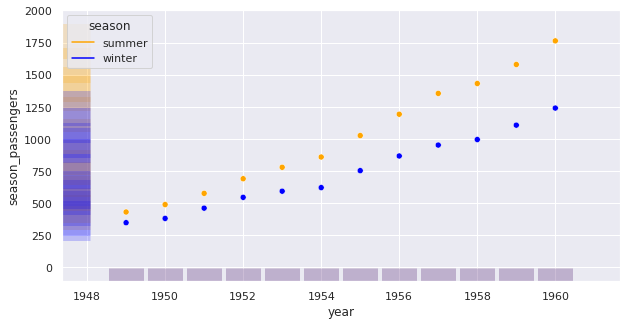

In [8]:
winterMonth = ['Dec','Jan','Feb']
seasonsStatFrame = pd.DataFrame()

for year in yearSet:
    data = dataByYear[year]
    summerPassengers = data[['month', 'passengers']][data.month.isin(summerMonth)].agg('sum')[0]
    notSummerPassengers = data[['month', 'passengers']][data.month.isin(winterMonth)].agg('sum')[0]
    summer = pd.DataFrame({'year': [year], 'season_passengers': [summerPassengers], 'season': ['summer']})
    winter = pd.DataFrame({'year': [year], 'season_passengers': [notSummerPassengers], 'season': ['winter']})
    seasonsStatFrame = seasonsStatFrame.append(summer)
    seasonsStatFrame = seasonsStatFrame.append(winter)

seasonsStatFrame.index = seasonsStatFrame['year']
seasonsStatFrame.index = np.arange(0, len(yearSet) * 2, 1)
plt.figure(figsize=(10, 5))
sns.scatterplot(data = seasonsStatFrame, x = 'year', y='season_passengers', hue = 'season', palette = ['orange', 'blue'])
sns.rugplot(data = seasonsStatFrame, x = 'year', y='season_passengers', hue = 'season', palette = ['orange', 'blue'], lw=35, alpha=0.2, height=0.05)

<AxesSubplot:xlabel='year', ylabel='passengers'>

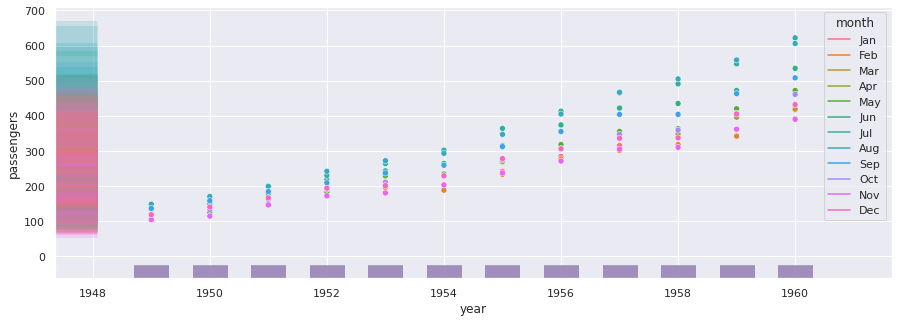

In [9]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data = flights, x = 'year', y='passengers', hue = 'month')
sns.rugplot(data = flights, x = 'year', y='passengers', hue = 'month', lw=35, alpha=0.2, height=0.05)

In [10]:
seasonsStatFrame

,year,season_passengers,season
0,1949,431,summer
1,1949,348,winter
2,1950,489,summer
3,1950,381,winter
4,1951,576,summer
5,1951,461,winter
6,1952,690,summer
7,1952,545,winter
8,1953,779,summer
9,1953,593,winter


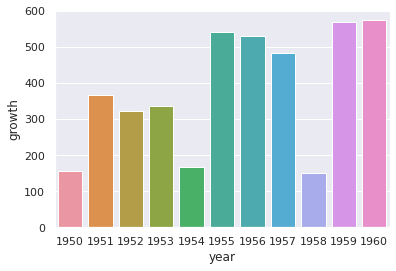

In [11]:
passengersPerYear = flights.groupby('year').agg('sum')
passengersPerYear.insert(0, 'year', yearSet)

growthPerYear = pd.DataFrame({'year': yearSet, 'growth': 0})
growthPerYear.index = yearSet

for i in growthPerYear.index:
    if i == min(yearSet):
        continue
    growthPerYear.at[i, 'growth'] = passengersPerYear.at[i, 'passengers'] - passengersPerYear.at[i - 1, 'passengers']

growthPerYear = growthPerYear.drop(labels = min(yearSet))

sns.barplot(growthPerYear['year'], growthPerYear['growth'])
plt.show()